In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # metric to use
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Ignore warnings :
warnings.filterwarnings('ignore')

# ggplot style
plt.style.use('ggplot')

# Load dataset

In [2]:
path = ""
fl = "diamonds_data.csv"
data = pd.read_csv(path + fl)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Dataset description

In [3]:
# 
print("----- Columns data type -----\n")
print(data.dtypes)

print("\n")

print("----- Missing values amount -----\n")
print(data.isnull().sum())

print("\n")

print("----- Shape -----\n")
print(data.shape)

----- Columns data type -----

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


----- Missing values amount -----

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


----- Shape -----

(53930, 10)


The data type is correct.

    carat	Carat weight of the diamond	                                              Numeric
    cut	    Describe cut quality of the diamond. 
            Quality in increasing order Fair, Good, Very Good, Premium, Ideal	      String
    color	Color of the diamond, with D being the best and J the worst	String
    clarity	How obvious inclusions are within the diamond:(in order from best to worst, 
            FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, 
            SI2, I1, I2, I3	                                                          String
    depth	depth % :The height of a diamond, measured from the culet to the table, 
            divided by its average girdle diameter	                                  Numeric
    table	table%: The width of the diamond's table expressed 
             as a percentage of its average diameter	                              Numeric
    price	The price of the diamond in muggle money	                              Numeric
    x	length of the diamond in mm	                                                  Numeric
    y	width of the diamond in mm	                                                  Numeric
    z	depth of the diamond in mm	                                                  Numeric


# Clean dataset

In [4]:
#There is "min" values equal zero in x,y and z. It is not possible, because if it happens then there is no diamond.
data.describe()


,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749325,57.457328,3933.054942,5.731236,5.734601,3.538776
std,0.474035,1.432711,2.234578,3989.628569,1.121807,1.142184,0.705729
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Let's check how many rows are with zero values.
data.loc[data["x"] == 0,"x"] = np.nan
data.loc[data["y"] == 0,"y"] = np.nan
data.loc[data["z"] == 0,"z"] = np.nan
data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [6]:
# We could impute missing values, but to avoid outliers let's to remove them.
data.dropna(inplace=True)
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Data understanding

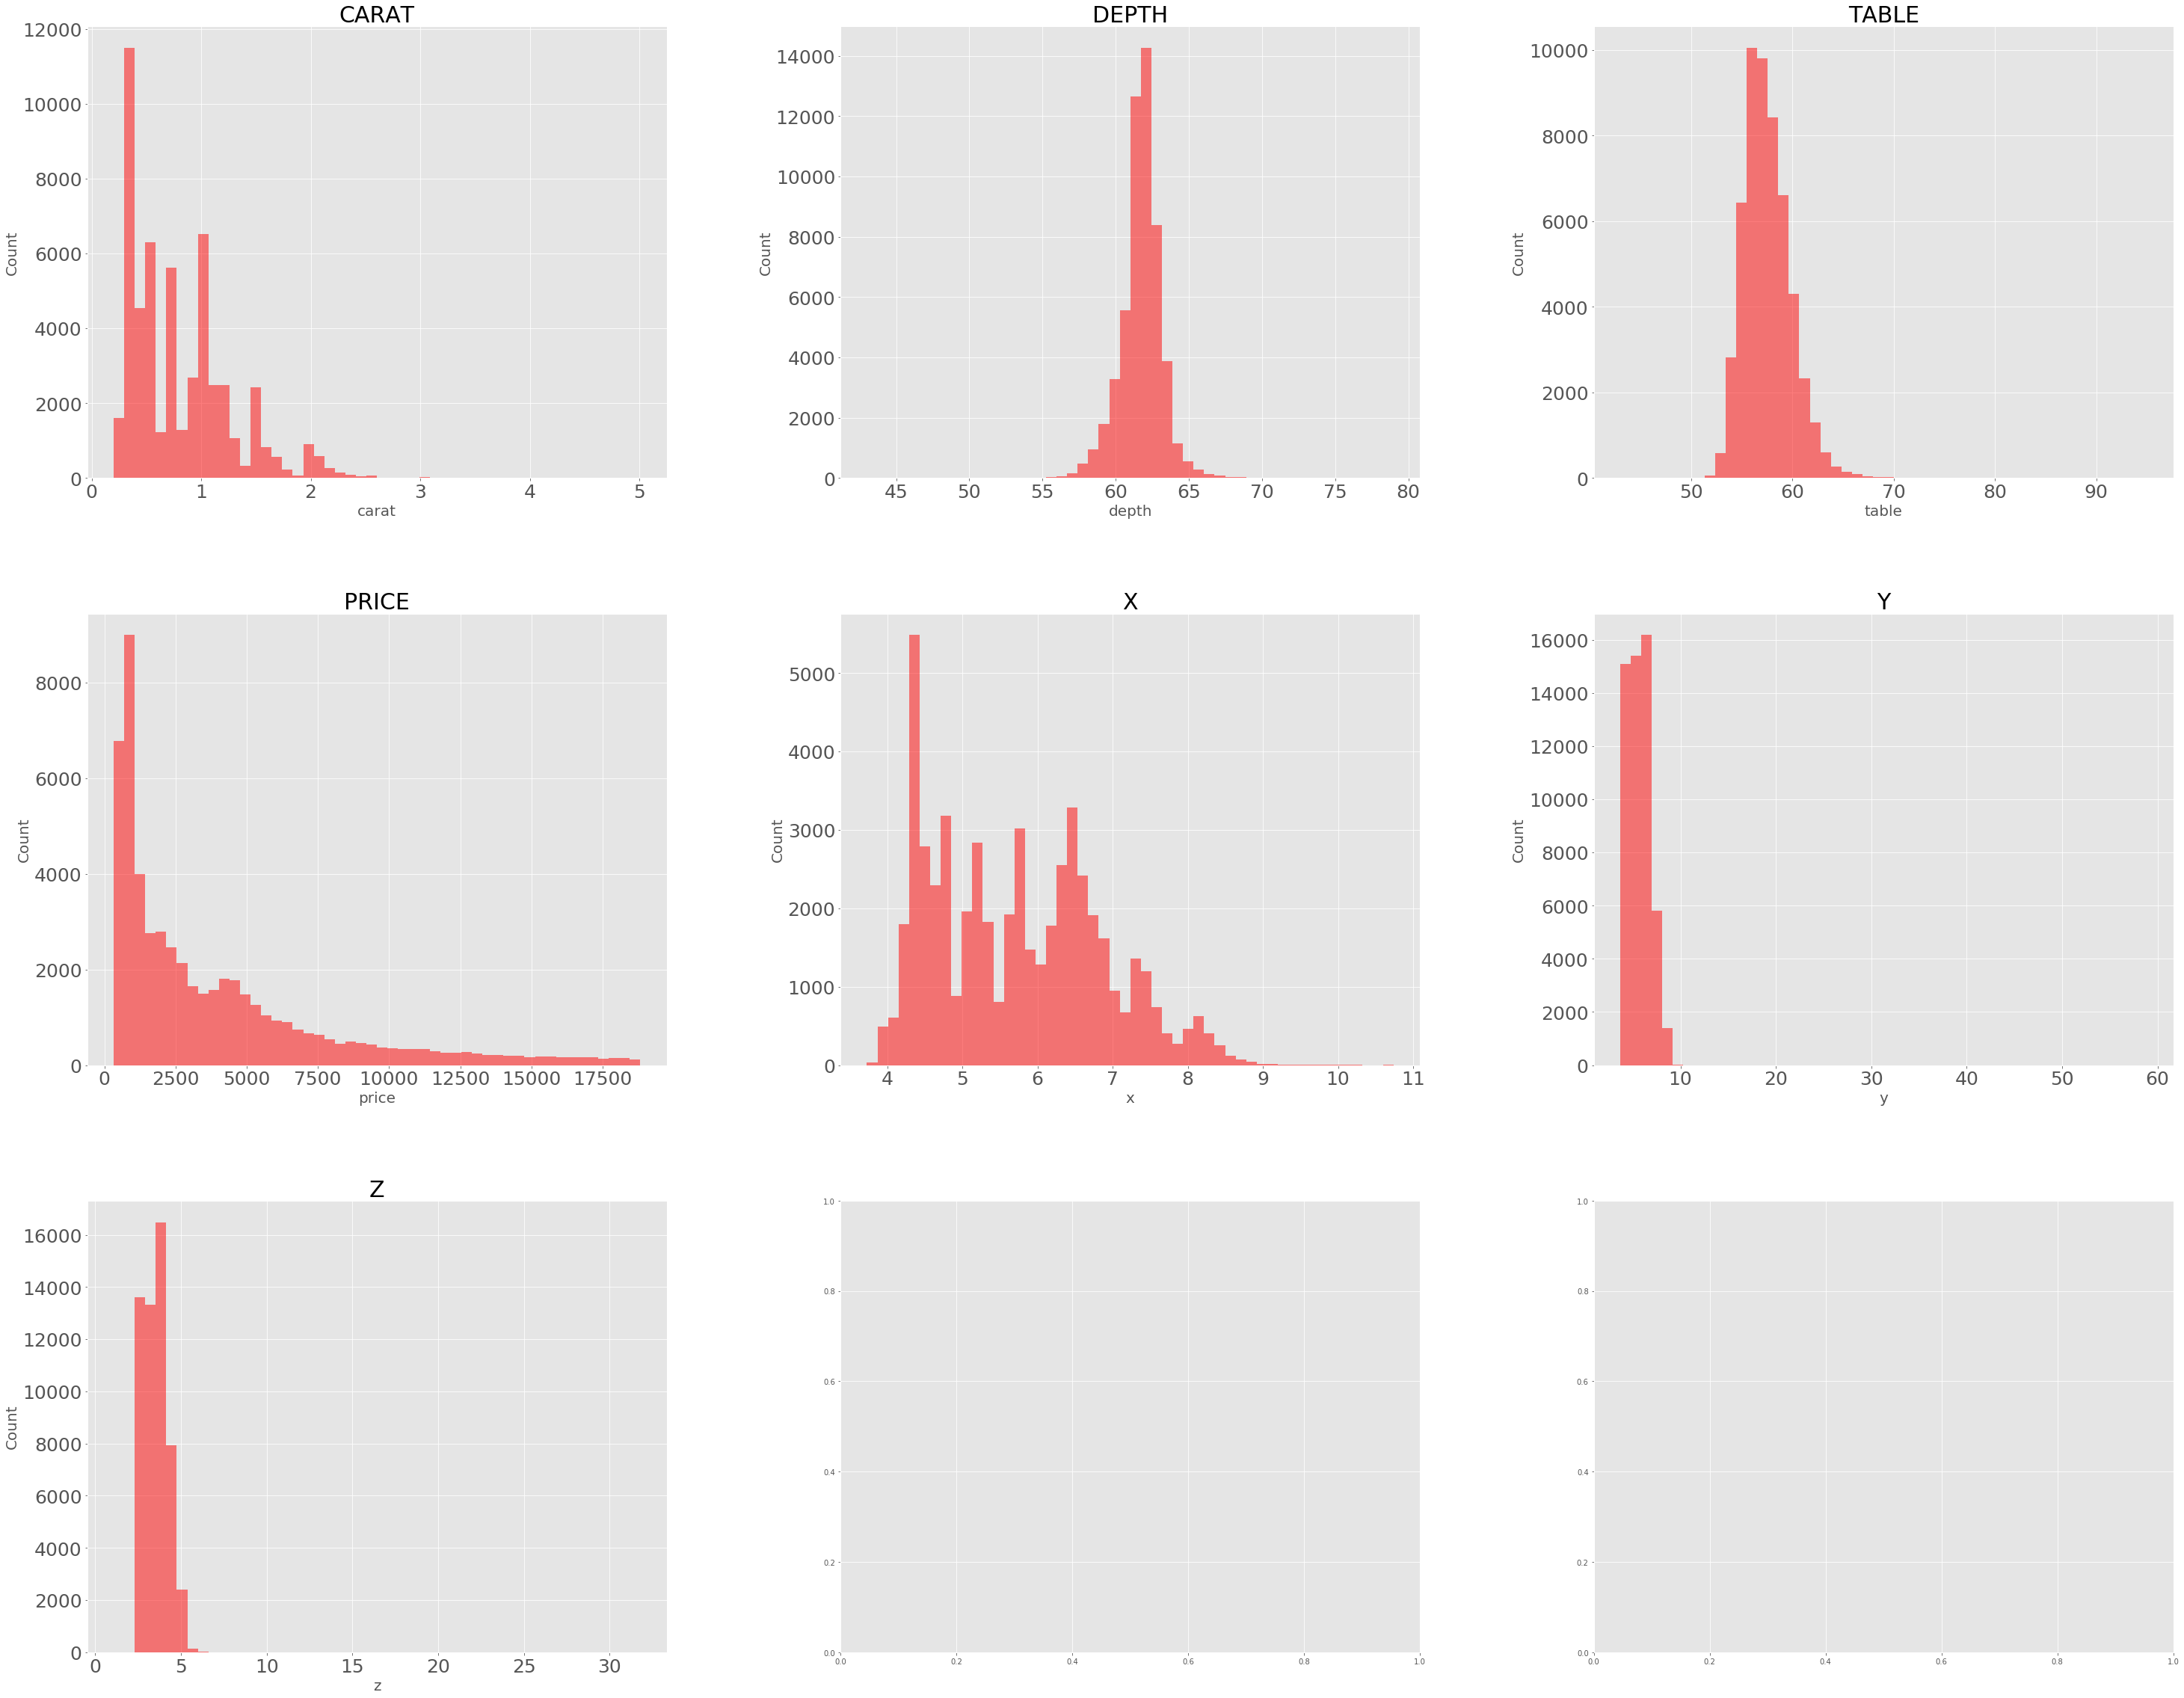

In [7]:
# Let's check the numeric feature distributions
cols = list(data.select_dtypes(exclude=['object']).dtypes.index)
fig, axes = plt.subplots(3, 3, figsize=(50, 40))

for col in cols:
    j = cols.index(col)
    i = j % 3
    j = int(j / 3)
    data.hist(column=col, bins=50, ax=axes[j,i], alpha=0.5, color='red')
    axes[j,i].set_title(col.upper(),  fontsize=30)
    axes[j,i].set_xlabel(col,fontsize=20)
    axes[j,i].set_ylabel("Count",fontsize=20)
    axes[j,i].tick_params(axis='y',labelsize=25)
    axes[j,i].tick_params(axis='x',labelsize=25)

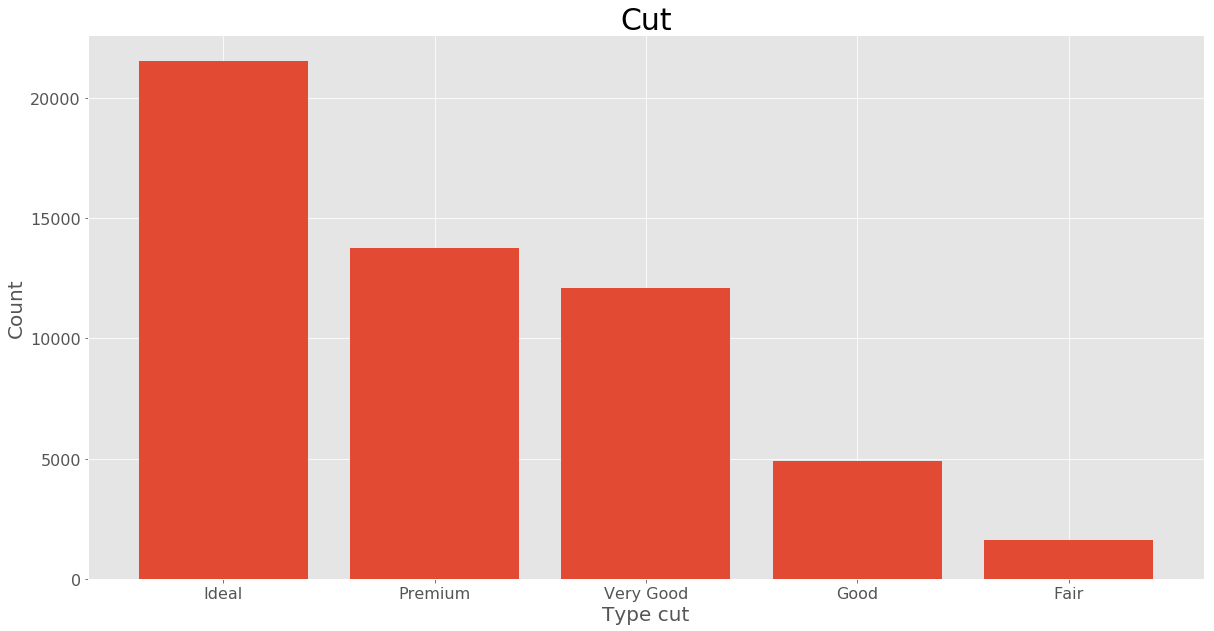

In [8]:
# Distribution of cut quality of the diamonds.
cut_ind = data["cut"].value_counts().index
cut_num = data["cut"].value_counts().values

fig = plt.figure(figsize=(20,10))
plt.bar(cut_ind, cut_num)
ax = plt.subplot(111)
ax.grid(True)
ax.set_title("Cut",fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type cut',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

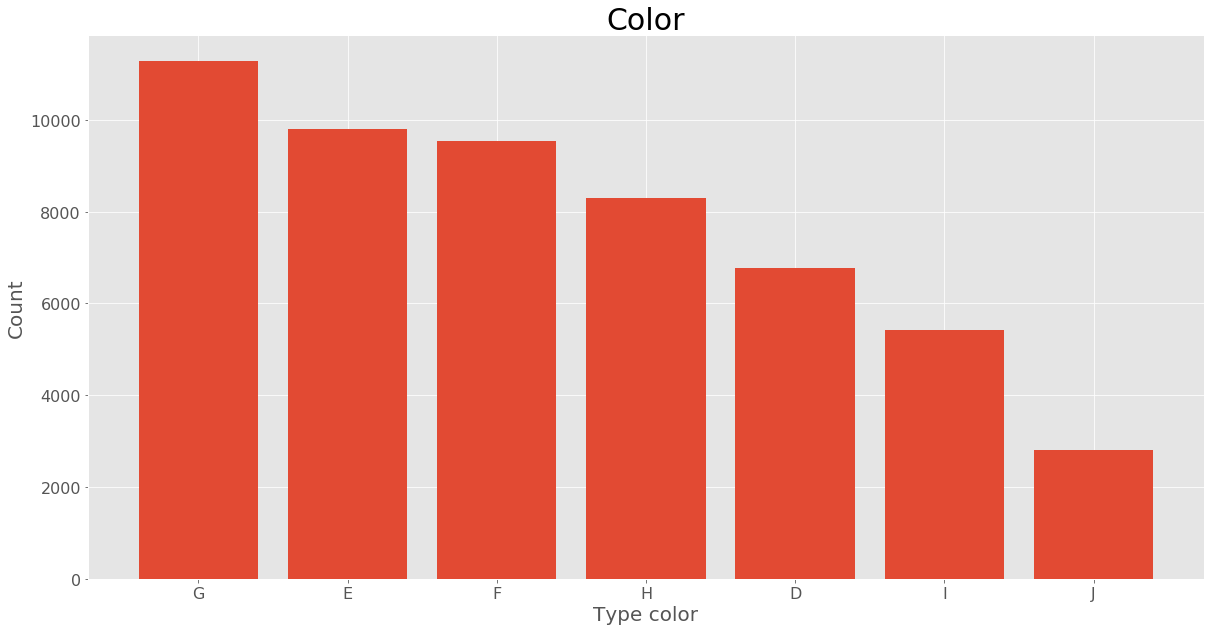

In [9]:
# Distribution of color of the diamonds.
color_ind = data["color"].value_counts().index
color_num = data["color"].value_counts().values

fig = plt.figure(figsize=(20,10))
plt.bar(color_ind, color_num)
ax = plt.subplot(111)
ax.grid(True)
ax.set_title("Color",fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type color',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

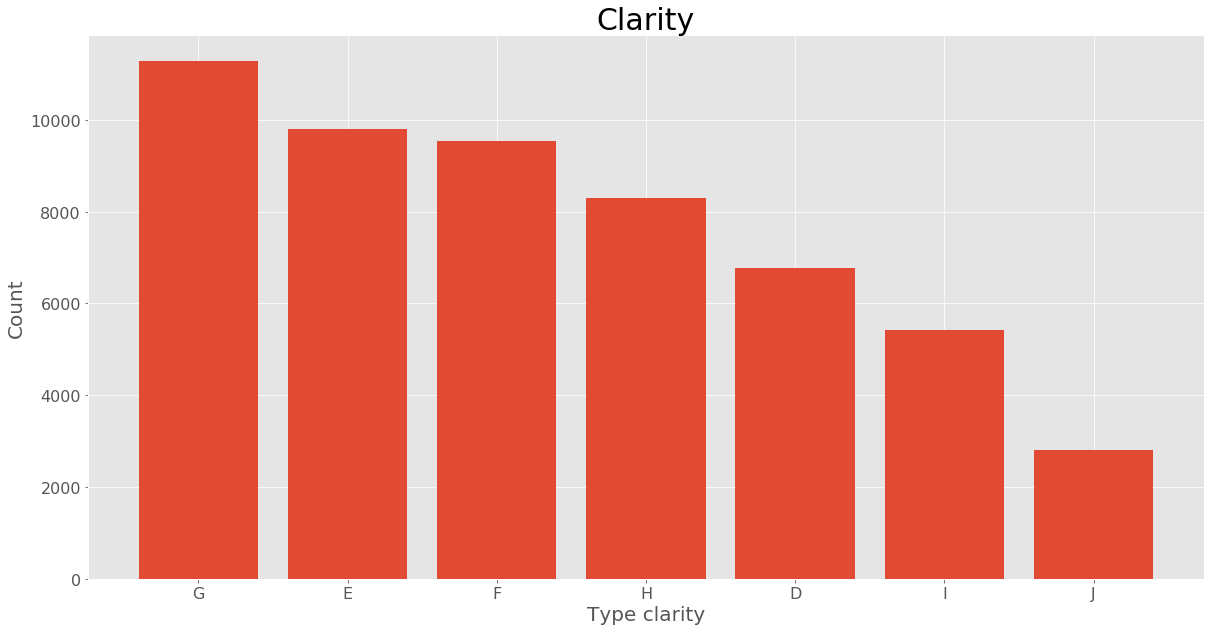

In [10]:
# Clarity of the diamonds.
# in order from best to worst FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
# There is not FL, I2 and I3

cla_ind = data["clarity"].value_counts().index
cla_num = data["clarity"].value_counts().values

fig = plt.figure(figsize=(20,10))
plt.bar(color_ind, color_num)
ax = plt.subplot(111)
ax.grid(True)
ax.set_title("Clarity",fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type clarity',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

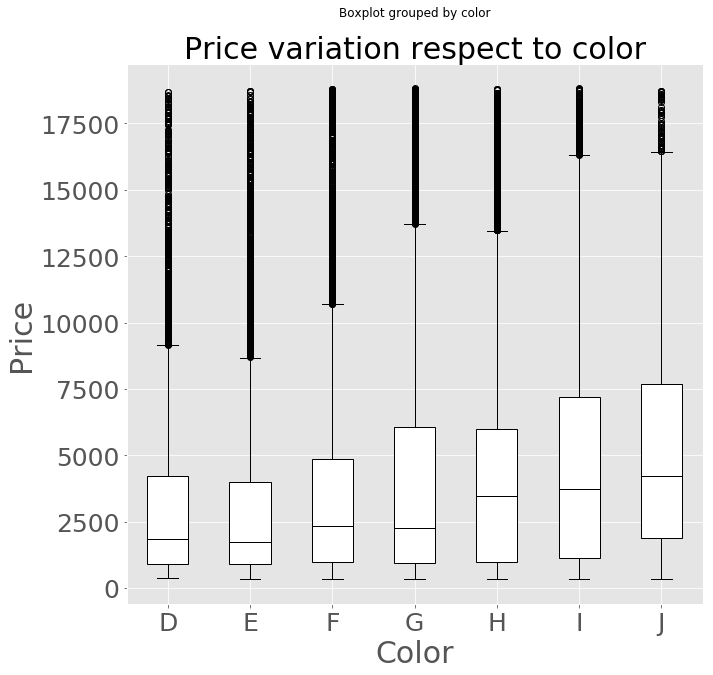

In [11]:
# Price variation respect to color (clarity or cut)
#Color of the diamond, with D being the best and J the worst.

fig, axes = plt.subplots(figsize=(10, 10))

boxplot = data.boxplot(column=['price'],by="color", ax =axes,patch_artist=True,return_type='dict')
color ='white'

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(boxplot["price"][element], color="black")

for patch in boxplot["price"]["boxes"]:
    patch.set(facecolor=color)
    
axes.set_title("Price variation respect to color",  fontsize=30)
axes.set_xlabel("Color",fontsize=30)
axes.set_ylabel("Price",fontsize=30)
axes.tick_params(axis='y',labelsize=25)
axes.tick_params(axis='x',labelsize=25)

In [12]:
# Change categorical features to numeric.

def encode_cat(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data) 
cat_cols = ["cut","color","clarity"]

for col in cat_cols:
    data[col] = encode_cat(data[col])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


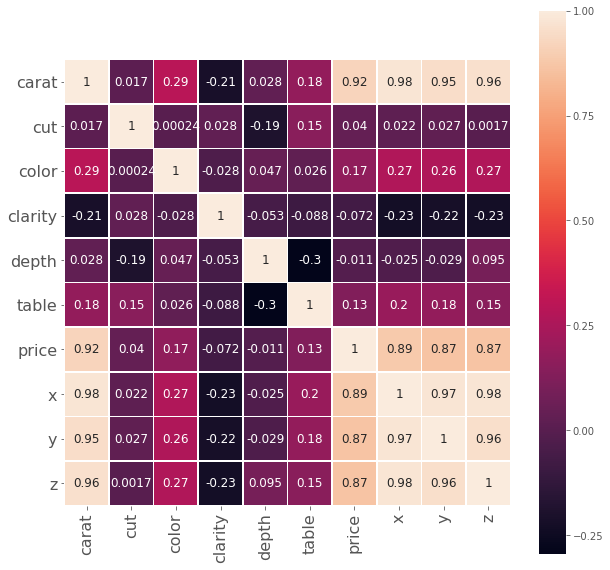

In [13]:
# Correlation of the data
"""
-The diamonds dimensions (x,y,z) are strongly correlated with carat.
-The carat is the one that is most correlated with price.
-Hypothesis: Based on the correlation plot, the dimensions of the diamond are strongly correlated 
             with each other and with the price. In the same way it is carat. 
             The, cut, depth, color, density and table features with any of the three remaining 
             attributes will be necessary to make the price prediction.

"""
plt.figure(figsize=(10,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = sns.heatmap(data.corr(), annot=True, square=True, linecolor='white',linewidths=.5,annot_kws={"size": 12}) 

# Data preparation and modeling

In [14]:
#shuffle data
data = data.sample(frac=1,random_state=0).reset_index(drop=True)

# Scale the data.
data2 = data.copy() #aux
#data = data2.copy()

y = data["price"]
x = data.drop(columns=["price"])
cols = x.columns
scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1.1)) #to avoid zero
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = cols
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.270478,1.10,0.433333,0.385714,0.630556,0.484615,0.492297,0.148533,0.195021
1,0.164449,0.60,0.600000,0.671429,0.600000,0.330769,0.296862,0.127707,0.167686
2,0.203950,0.85,0.266667,0.385714,0.619444,0.465385,0.378174,0.135494,0.178750
3,0.206029,0.60,0.433333,0.814286,0.630556,0.311538,0.378174,0.136943,0.180377
4,0.212266,1.10,0.600000,0.671429,0.566667,0.388462,0.402425,0.140022,0.179401


In [15]:
#I going to compare four regression algorithms (I have used them before and they are well-know in literature).


# It takes so many time
"""
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
"""

#Regression algorithms with default parameters
lin = linear_model.LinearRegression()
rndf = RandomForestRegressor(random_state=0, n_jobs=-1)
gbr = GradientBoostingRegressor(random_state=0)
etr = ExtraTreesRegressor(n_jobs=-1, random_state=0)

# To select the best algorithm, cross validation is used.
models = [lin, rndf, gbr, etr]
scores = []

#MAE is used as metric due to it is robust to outliers.
for m in models:
    s = cross_val_score(m, x, y, scoring = "neg_mean_absolute_error", cv=5)
    print(s)
    scores.append(s)



[-868.48472387 -860.87751574 -859.45831184 -846.46560509 -864.74477794]
[-287.87860307 -274.46348018 -284.75925947 -283.02288903 -288.33630225]
[-374.09456575 -360.91029677 -375.06394365 -363.60385067 -366.98082968]
[-280.01780282 -273.01010171 -279.87792154 -279.21092098 -279.69825635]


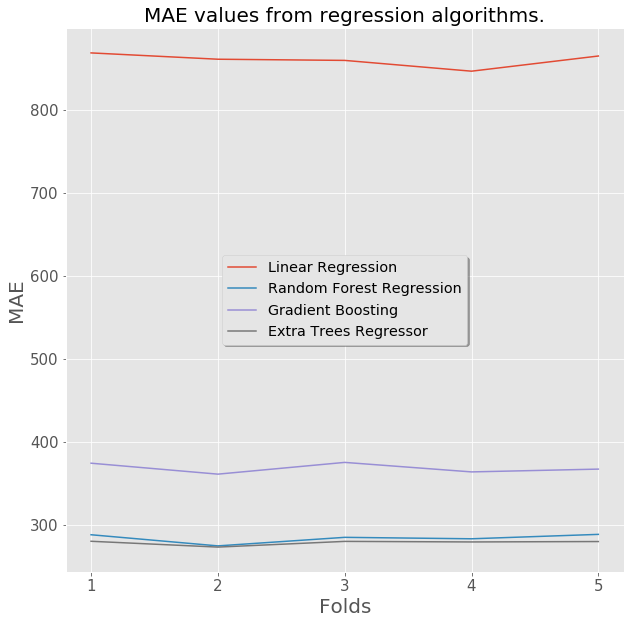

In [16]:
# It seems the Random Forest Regression and Extra Trees Regressor are the best algorithms.
t = range(1,len(scores) + 2)
fig, axes = plt.subplots(figsize=(10, 10))
axes.plot(t, abs(scores[0]),label='Linear Regression')
axes.plot(t, abs(scores[1]),label='Random Forest Regression')
axes.plot(t, abs(scores[2]),label='Gradient Boosting')
axes.plot(t, abs(scores[3]),label='Extra Trees Regressor')
legend = axes.legend(loc='center', shadow=True, fontsize='x-large')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.xlabel('Folds',fontsize=20)
plt.ylabel('MAE',fontsize=20)
dim = np.arange(1,6,1)
plt.xticks(dim)
axes.set_title("MAE values from regression algorithms.",  fontsize=20)
plt.show()

In [17]:
# Create training and test datsets
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 123, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37737, 9)
(37737,)
(16173, 9)
(16173,)


In [18]:
def metrics(y_test,y_pred,n,p):
    print("Mean absolute error LR:", mean_absolute_error(y_test,y_pred))
    #print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
    R2 = r2_score(y_test,y_pred)
    adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
    print('Adjusted R Squared: {}'.format(adj_rsquared))
#cols = ["cut","depth","color","table", "carat"]
#train = x_train[cols]
#test = x_test[cols]
train = x_train
test = x_test


n=test.shape[0]
p=test.shape[1] - 1

print("\nRandom Forest")
rndf = RandomForestRegressor(random_state=0, n_jobs=-1)
#rndf = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100,n_jobs=-1)
rndf.fit(train,y_train)
y_pred_r = rndf.predict(test)
metrics(y_test,y_pred_r,n,p)

print("\nGradient Boosting")
gbr = GradientBoostingRegressor(random_state=0)
#gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, n_jobs=-1, random_state=0, loss='ls')
gbr.fit(train, y_train)
y_pred_g = gbr.predict(test)
metrics(y_test,y_pred_g,n,p)

print("\nExtra Trees")
etr = ExtraTreesRegressor(n_jobs=-1, random_state=0)
#etr = ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
etr.fit(train, y_train)
y_pred_e = etr.predict(test)
metrics(y_test,y_pred_e,n,p)


Random Forest
Mean absolute error LR: 286.26837954497944
Adjusted R Squared: 0.9789563696358099

Gradient Boosting
Mean absolute error LR: 371.1343471051312
Adjusted R Squared: 0.9702152615117757

Extra Trees
Mean absolute error LR: 284.6502473257899
Adjusted R Squared: 0.9793618467626329


In [19]:
# If we combine the three predicted values from thre algorithms, the error is reduced.
y_pred = (y_pred_r + y_pred_e + y_pred_g)/3
metrics(y_test,y_pred,n,p)

Mean absolute error LR: 282.31020423798265
Adjusted R Squared: 0.9804173952110847


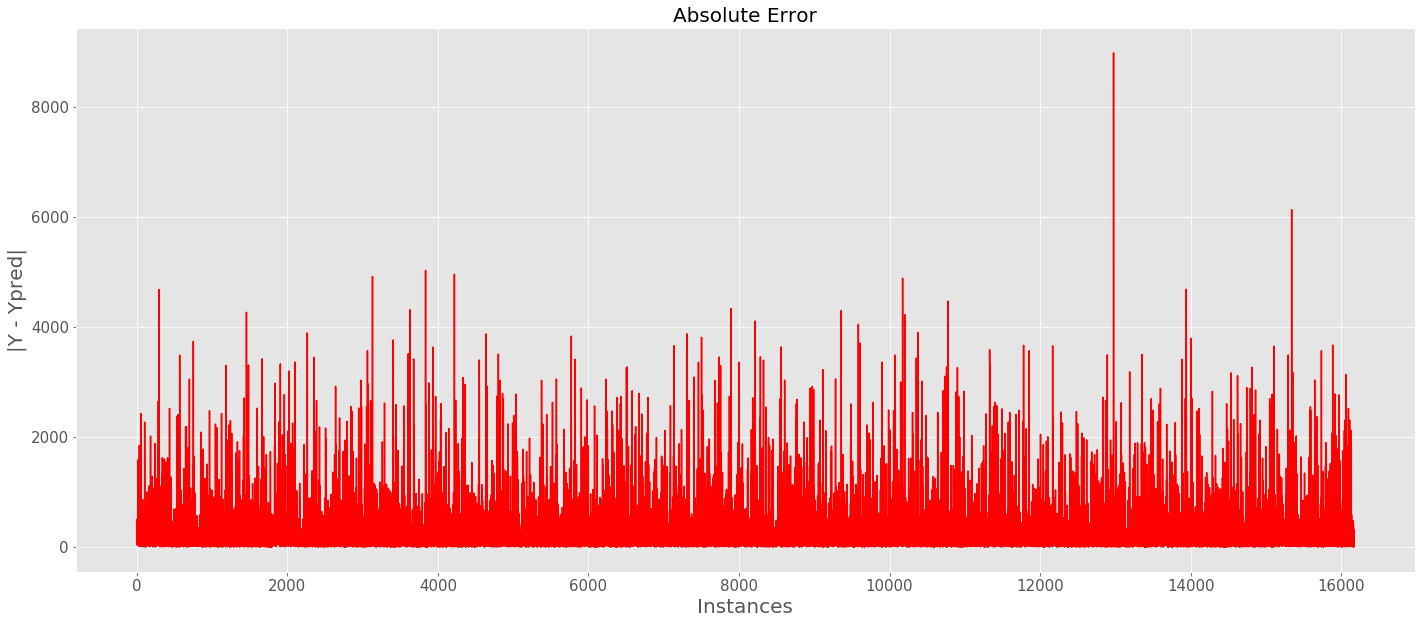

In [20]:
"""
plt.subplots(figsize=(15,10))
plt.plot(rng,y_test, color = "red")
plt.plot(rng,y_pred, color = "green")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
"""

#it seems there is an outlier or maybe the algorithms cannot predict better the instance.

rng = range(0,y_test.shape[0])
plt.subplots(figsize=(24,10))
plt.plot(rng,abs(y_test - y_pred), color = "red")
plt.title("Absolute Error",fontsize=20)
plt.xlabel("Instances",fontsize=20)
plt.ylabel("|Y - Ypred|",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


# Feature engineering

In [21]:
# Let's create some features and test the algorithms to know if the error decreases.
data3 = x.copy()

data3["sum_xyz"] = data3["x"] + data3["y"] + data3["z"] + data3["carat"]
#data3["sum_xy"] = data3["x"] + data3["y"]
#data3["sum_xz"] = data3["x"] + data3["z"]
#data3["sum_yz"] = data3["y"] + data3["z"]

data3["product_xyz"] = data3["x"]*data3["y"]*data3["z"]*data3["carat"]
#data3["product_xy"] = data3["x"]*data3["y"]

data3["sub_xz"] = abs(data3["x"] - data3["z"] - data3["carat"])

data3["sub_xy"] = abs(data3["x"] - data3["y"] - data3["carat"])

data3["ratio_xy"] = data3["x"]*data3["carat"]/data3["y"]
data3["ratio_xz"] = data3["x"]*data3["carat"]/data3["z"]

data3["sub_yz"] = abs(data3["y"] - data3["z"])
data3["ratio_yz"] = data3["y"]/data3["z"]

data3["density"] = data3["carat"]/(data3["x"]*data3["y"]*data3["z"])
data3["depth_table"] = data3["depth"]*data3["table"]

data3["std"] = data3[["x","y","z"]].std(axis=1)
data3["std_oth"] = data3[["carat","depth","table"]].std(axis=1)
data3["skew"] = data3[["x","y","z"]].skew(axis=1)
data3["skew_oth"] = data3[["carat","depth","table"]].skew(axis=1)

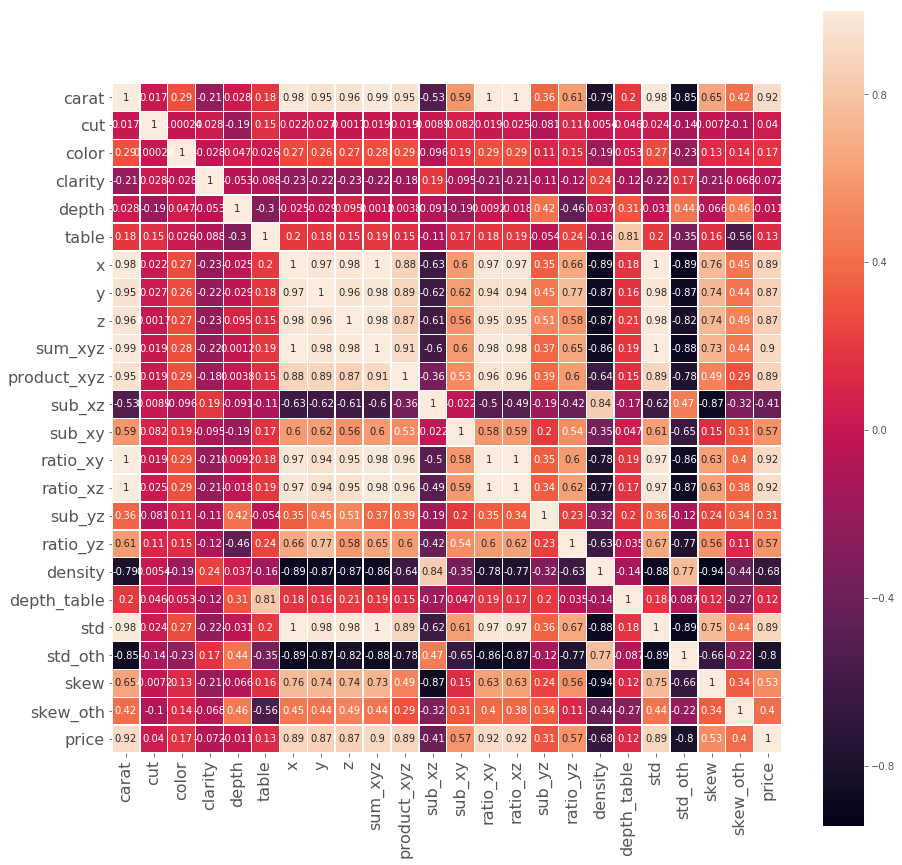

In [22]:
#Let's see the correlation matrix to undertand deeper the features.
tmp = data3.copy()
tmp["price"] = y
plt.figure(figsize=(15,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cor = tmp.corr()
ax = sns.heatmap(cor, annot=True, square=True, linecolor='white',linewidths=.5,annot_kws={"size": 10}) 

In [23]:
# Let's try with all features.
x_train, x_test, y_train, y_test = train_test_split(data3, y, random_state = 123, test_size=0.3)

train = x_train
test = x_test
    
n=test.shape[0]
p=test.shape[1] - 1

print("\nRandom Forest")
rndf = RandomForestRegressor(random_state=0, n_jobs=-1)
#rndf = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100,n_jobs=-1)
rndf.fit(train,y_train)
y_pred_r = rndf.predict(test)
metrics(y_test,y_pred_r,n,p)

print("\nGradient Boosting")
gbr = GradientBoostingRegressor(random_state=0)
#gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, n_jobs=-1, random_state=0, loss='ls')
gbr.fit(train, y_train)
y_pred_g = gbr.predict(test)
metrics(y_test,y_pred_g,n,p)

print("\nExtra Trees")
etr = ExtraTreesRegressor(n_jobs=-1, random_state=0)
#etr = ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
etr.fit(train, y_train)
y_pred_e = etr.predict(test)
metrics(y_test,y_pred_e,n,p)


Random Forest
Mean absolute error LR: 291.195343974231
Adjusted R Squared: 0.9786067146956868

Gradient Boosting
Mean absolute error LR: 371.9906170598004
Adjusted R Squared: 0.9697757746242514

Extra Trees
Mean absolute error LR: 289.95396957892785
Adjusted R Squared: 0.9785332793212269


In [24]:
# The error value is not improved (282.31).
y_pred = (y_pred_r + y_pred_e + y_pred_g)/3
metrics(y_test,y_pred,n,p)

Mean absolute error LR: 286.40963919976355
Adjusted R Squared: 0.9798242707968857


In [25]:
# To select best features, correlation will be used.
cor_target = abs(cor["price"]) # correlation values
relevant_features = cor_target[(cor_target>0.5) & (cor_target<1)] #take those features which correlation values are greater than 0.5 and to discard price < 1.
relevant_features

carat          0.921591
x              0.887227
y              0.867859
z              0.868202
sum_xyz        0.902887
product_xyz    0.892123
sub_xy         0.572146
ratio_xy       0.922708
ratio_xz       0.924131
ratio_yz       0.567530
density        0.677398
std            0.890208
std_oth        0.803273
skew           0.533399
Name: price, dtype: float64

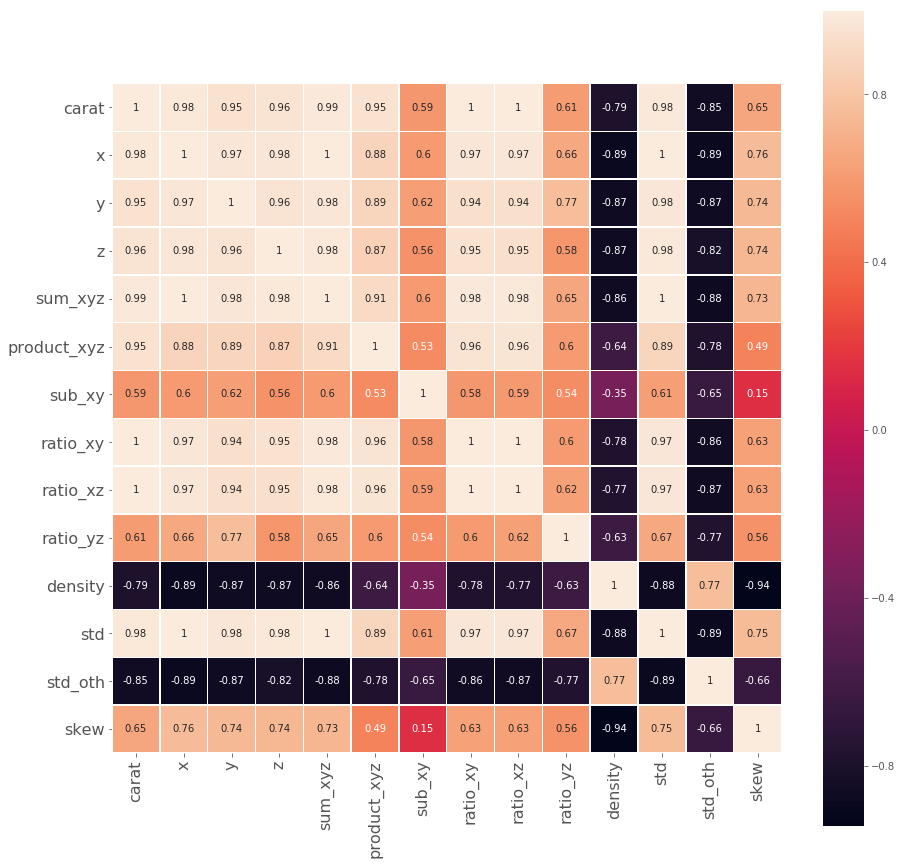

In [26]:
"""
    - carat is strongly correlated  with most of the features. So I will select it.
    - sub_xy, ratio_yz  and skwew seem a good option because of their correlation values.
"""

plt.figure(figsize=(15,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

tmp = data3[relevant_features.index]
cor = tmp.corr()
ax = sns.heatmap(cor, annot=True, square=True, linecolor='white',linewidths=.5,annot_kws={"size": 10}) 

#carat,sub_xy,ratio_yx

In [27]:
# Let's check the new values with the selected features.
# Note: I could transform this code snippet in a function.

x_train, x_test, y_train, y_test = train_test_split(data3, y, random_state = 123, test_size=0.3)

columns = ["sub_xy", "ratio_yz", "carat", "skew"]
train = x_train[columns]
test = x_test[columns]
    
n=test.shape[0]
p=test.shape[1] - 1

print("\nRandom Forest")
rndf = RandomForestRegressor(random_state=0, n_jobs=-1)
#rndf = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100,n_jobs=-1)
rndf.fit(train,y_train)
y_pred_r = rndf.predict(test)
metrics(y_test,y_pred_r,n,p)

print("\nGradient Boosting")
gbr = GradientBoostingRegressor(random_state=0)
#gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, n_jobs=-1, random_state=0, loss='ls')
gbr.fit(train, y_train)
y_pred_g = gbr.predict(test)
metrics(y_test,y_pred_g,n,p)

print("\nExtra Trees")
etr = ExtraTreesRegressor(n_jobs=-1, random_state=0)
#etr = ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
etr.fit(train, y_train)
y_pred_e = etr.predict(test)
metrics(y_test,y_pred_e,n,p)


Random Forest
Mean absolute error LR: 846.246990725799
Adjusted R Squared: 0.8565321775021626

Gradient Boosting
Mean absolute error LR: 788.1552021443008
Adjusted R Squared: 0.8790327277474725

Extra Trees
Mean absolute error LR: 872.4261557611683
Adjusted R Squared: 0.8474092173777972


In [28]:
"""
# To delete outliers in training dataset and train the algorithms. But there's not time.
def delete_outliers():
    from sklearn.ensemble import IsolationForest
    clf = IsolationForest()
    clf.fit(x_train)  # fit 10 trees  
    y_pred_train = clf.predict(x_train)
    print(list(y_pred_train).count(-1))

    x_train["out"] = y_pred_train
    x_train = x_train.loc[x_train["out"] == 1]
    x_train.drop(columns=["out"],inplace=True)
    
    y_train["out"] = y_pred_train
    y_train = y_train.loc[y_train["out"] == 1]
    y_train.drop(columns=["out"],inplace=True)
"""

'\n# To delete outliers in training dataset and train the algorithms. But there\'s not time.\ndef delete_outliers():\n    from sklearn.ensemble import IsolationForest\n    clf = IsolationForest()\n    clf.fit(x_train)  # fit 10 trees  \n    y_pred_train = clf.predict(x_train)\n    print(list(y_pred_train).count(-1))\n\n    x_train["out"] = y_pred_train\n    x_train = x_train.loc[x_train["out"] == 1]\n    x_train.drop(columns=["out"],inplace=True)\n    \n    y_train["out"] = y_pred_train\n    y_train = y_train.loc[y_train["out"] == 1]\n    y_train.drop(columns=["out"],inplace=True)\n'